# Game Day Analysis Challenge
- Given the pulled tweets from Twitter API, come up with insights on the data!

## Import, Read, and Info

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import json

In [3]:
# load csv
df = pd.read_csv('data\gd_tweets_2023_FULL.csv')

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_29292\2273980729.py:2: DtypeWarning: Columns (9,19,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data\gd_tweets_2023_FULL.csv')


In [4]:
# Drop unneccessary Columns
df = df.drop(['withheld.copyright', 'withheld.country_codes_x', 'withheld.country_codes_y', 'withheld.country_codes', 'withheld.scope', 'geo.place_id', 'entities.cashtags', 'attachments.poll_ids', 'geo.coordinates.type', 'geo.coordinates.coordinates', 'attachments.media_keys', 'in_reply_to_user_id', 'entities.urls', 'referenced_tweets', 'edit_history_tweet_ids','team_name','conversation_id', 'reply_settings', 'author_id', 'edit_controls.edits_remaining', 'edit_controls.is_edit_eligible', 'edit_controls.editable_until', 'timestamp', 'keyword' ], axis=1)

In [5]:
df=df.dropna(subset=['time_period_of_the_game', 'brand_ad_name', 'keywords', 'created_at', 'possibly_sensitive', 'id', 'lang', 'text', 'public_metrics.retweet_count', 'public_metrics.reply_count', 'public_metrics.like_count', 'public_metrics.quote_count', 'public_metrics.impression_count'])

In [6]:
# Count nulls
df.isna().sum()

time_period_of_the_game                  0
brand_ad_name                            0
keywords                                 0
created_at                               0
possibly_sensitive                       0
id                                       0
lang                                     0
text                                     0
entities.hashtags                  1290128
entities.mentions                   391430
public_metrics.retweet_count             0
public_metrics.reply_count               0
public_metrics.like_count                0
public_metrics.quote_count               0
public_metrics.impression_count          0
entities.annotations                816112
name                                   300
username                               209
location                            779188
dtype: int64

In [7]:
df = df[~df['keywords'].str.contains('bts')]

## Twitter Hashtags Count

In [8]:
df_hashtags = df.dropna(subset=['entities.hashtags'])

In [9]:
hashtags = df_hashtags['entities.hashtags']

hashtags_freq = {}

for row in hashtags:
    row = row.replace("\'", "\"")
    row = json.loads(row)
    for tag in row:
        tag = tag['tag']
        tag = tag.lower()
        hashtags_freq[tag] = hashtags_freq.setdefault(tag, 0) + 1

['superbowl', 'theflashmovie', 'sweepstakes', 'easytoenjoy', 'cellysweepstakes', 'sblvii', 'theflash', 'timeoutforbuds', 'superbowllvii', 'ultraclub', 'zerodebate', 'doritostrianglescheme', 'gotgvol3', 'applemusichalftime', 'entry', 'realoracting', 'rihanna', 'depthcampaign', 'indianajones', 'contest', 'slowmo', 'buschguide', 'wheelsup', 'whoareyou', 'makeitbetter', 'popcorners10k', 'bambam', 'freenft', 'wlopportunity', 'guardiansofthegalaxyvol3', 'batman', 'transformers', 'fentybowl', 'lisaxcelinewinter23', 'lisa', 'halftimeshow', 'popcornersbreakinggood', 'nft', 'popcornersbreakingbad', 'greatacting', 'nfl', 'ガーディアンズオブギャラクシー', 'greattaste', 'riri', 'disney100', 'supergirl', 'superbowl2023', 'eagles', 'ad', 'lisaxceline']


C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12460 (\N{KATAKANA LETTER GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 

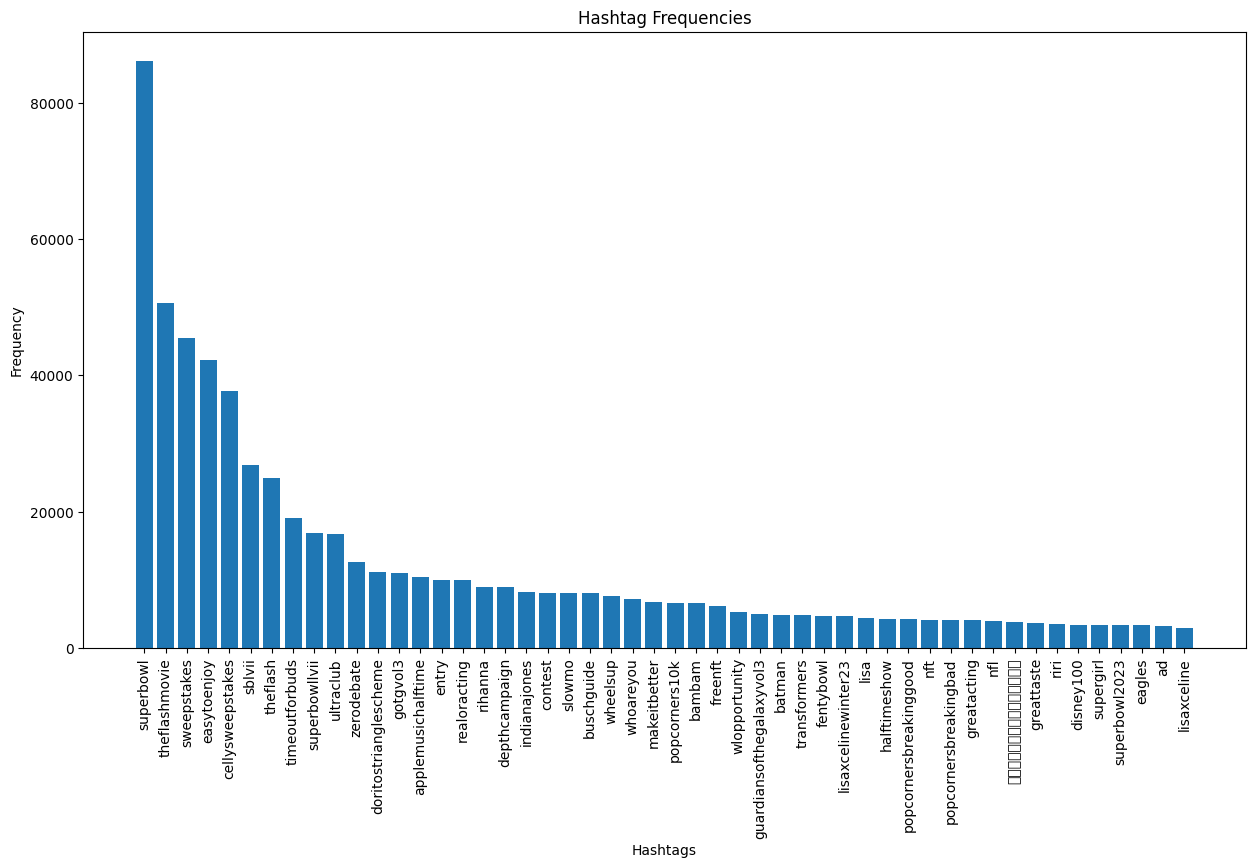

In [10]:
sorted_hashtags_freq = sorted(hashtags_freq.items(), key=lambda x: x[1], reverse=True)
top_hashtags_freq = sorted_hashtags_freq[:50]

tags = [x[0] for x in top_hashtags_freq]
freq = [x[1] for x in top_hashtags_freq]

print(tags)

plt.rc('font', family=['DejaVu Sans'])

plt.figure(figsize=(15, 8))
plt.bar(tags, freq)

# print(tags[50-7])

plt.title('Hashtag Frequencies')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
plt.show()

## Hashtags Word Cloud

In [11]:
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

import matplotlib.colors as mcolors

In [12]:
hashtags_wordcloud_mask = np.array(Image.open("images/tweetmask-transparent.png"))

background = ['#F2F2F2']
colors = ['#012E40', '#025E73','#113E59','#19403c']
cmap = mcolors.ListedColormap(colors)

In [13]:
hashtags_wordcloud = WordCloud(max_words=1000, background_color=None, mode="RGBA", colormap=cmap, scale=4, min_font_size=5, mask=hashtags_wordcloud_mask)
hashtags_wordcloud.generate_from_frequencies(hashtags_freq)

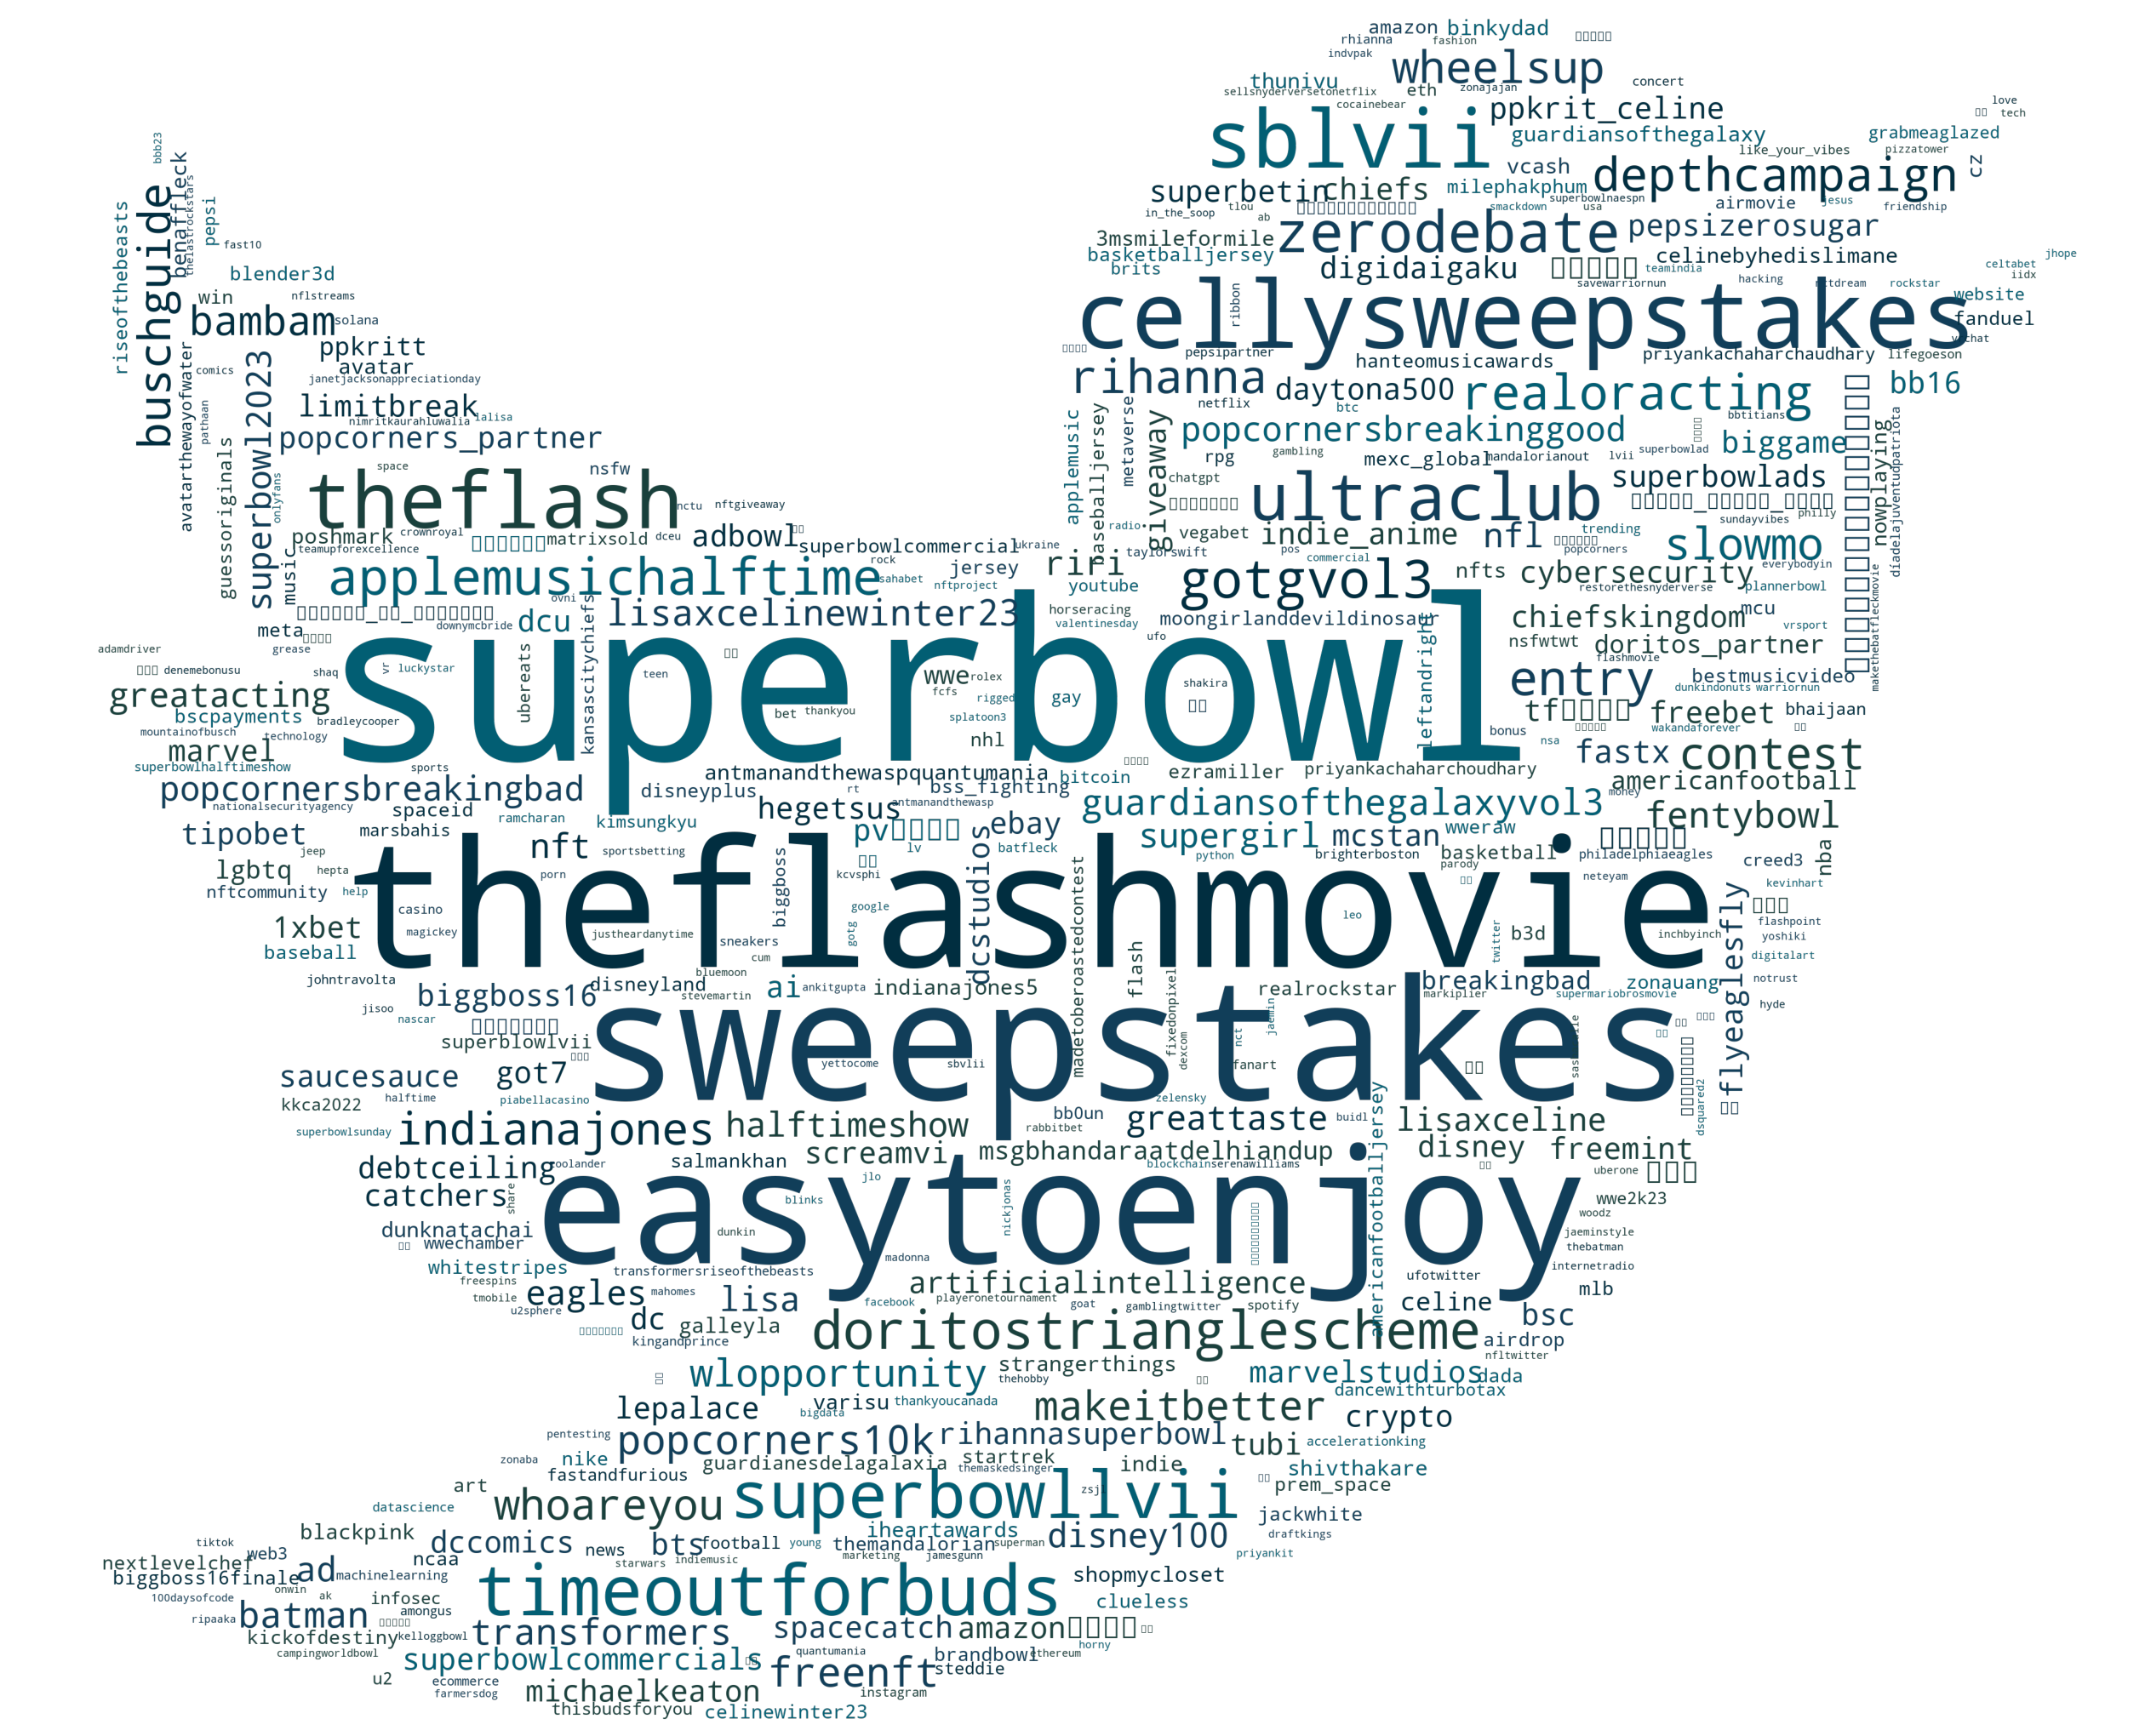

In [14]:
# plot the wordcloud
plt.figure(figsize=(25, 25))
plt.imshow(hashtags_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# show the plot
plt.show()

hashtags_wordcloud.to_file("export/wc.png")

## Tweets Freq vs Time

In [15]:
# drop all columns except the created_at
df_time = df[['created_at']]
df_time.head()

,created_at
1,2023-02-13T04:18:06.000Z
2,2023-02-13T04:17:58.000Z
3,2023-02-13T03:05:52.000Z
4,2023-02-13T03:05:11.000Z
5,2023-02-13T03:01:05.000Z


In [16]:
df_time['created_at'] = pd.to_datetime(df_time['created_at'])
df_time['created_at'] = df_time['created_at'].dt.tz_convert('MST')

counts = df_time.groupby(pd.Grouper(key='created_at', freq='T')).size()

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_29292\3806884353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['created_at'] = pd.to_datetime(df_time['created_at'])
C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_29292\3806884353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['created_at'] = df_time['created_at'].dt.tz_convert('MST')


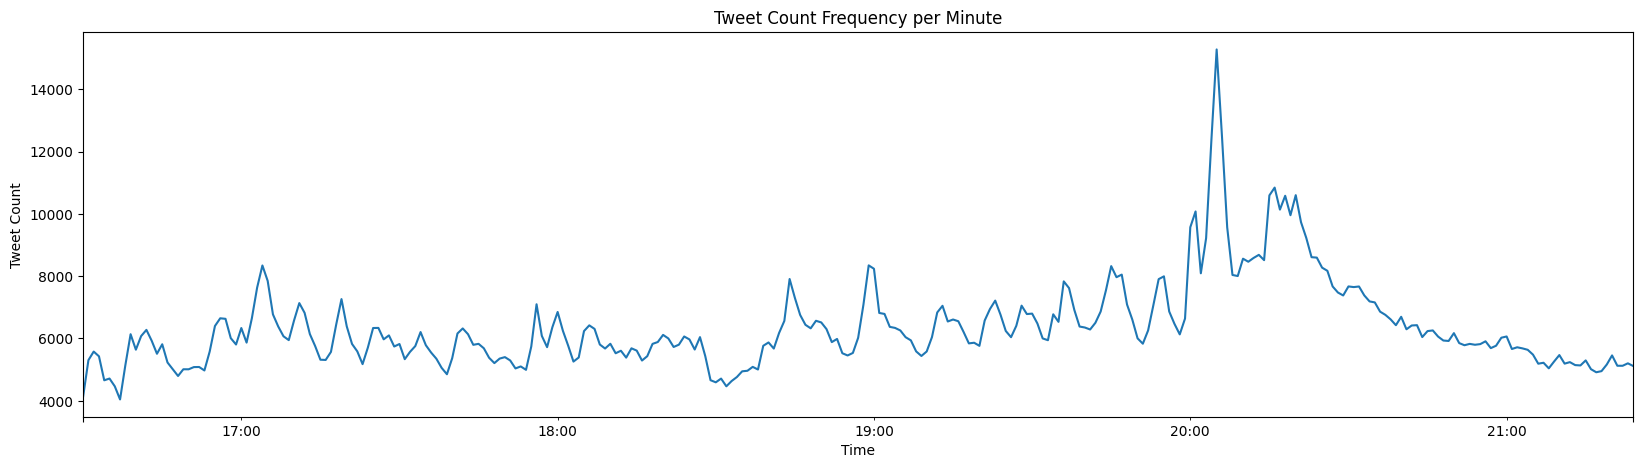

In [17]:
# display area graph
counts_plot = counts.plot(kind='line', stacked=True, figsize=(20, 5))
counts_plot.set_title('Tweet Count Frequency per Minute')
counts_plot.set_xlabel('Time')
counts_plot.set_ylabel('Tweet Count')

for i, bar in enumerate(counts_plot.patches):
    if i % 2 == 0:
        bar.set_facecolor('r')
    else:
        bar.set_facecolor('b')

plt.show()

In [18]:
counts.to_csv('export/gdac_tweetstamps.csv')

## Tweets Per Quarter

In [19]:
df_quarters = df[['created_at']]

In [20]:
df_quarters['created_at'] = pd.to_datetime(df_quarters['created_at'])
df_quarters['created_at'] = df_quarters['created_at'].dt.tz_convert('MST')

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_29292\954246170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarters['created_at'] = pd.to_datetime(df_quarters['created_at'])
C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_29292\954246170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarters['created_at'] = df_quarters['created_at'].dt.tz_convert('MST')


In [21]:

def get_data_between_times(start, end):
    start = pd.to_datetime('2023-02-12 ' + start + ':00')
    start = start.tz_localize('MST')
    end = pd.to_datetime('2023-02-12 ' + end + ':00')
    end = end.tz_localize('MST')

    filtered_df = df_quarters[(df_quarters['created_at'] >= start) & (df_quarters['created_at'] <= end)]
    return filtered_df

pre = get_data_between_times('16:00', '16:44')
q1 = get_data_between_times('16:44', '17:24')
q2 = get_data_between_times('17:24', '18:16')
ht = get_data_between_times('18:16', '19:00')
q3 = get_data_between_times('19:00', '19:27')
q4 = get_data_between_times('19:27', '20:15')
end = get_data_between_times('20:15', '22:00')

In [22]:
quarter_per_tweet = {
    "Pre-Game": [pre.shape[0]],
    "Quarter 1": [q1.shape[0]],
    "Quarter 2": [q2.shape[0]],
    "Halftime": [ht.shape[0]],
    "Quarter 3": [q3.shape[0]],
    "Quarter 4": [q4.shape[0]],
    "Post-Game": [end.shape[0]]
}

quarter_per_tweet = pd.DataFrame(quarter_per_tweet)
quarter_per_tweet.to_csv('export/gdac_tweets_per_quarter.csv', index=False)

<Axes: >

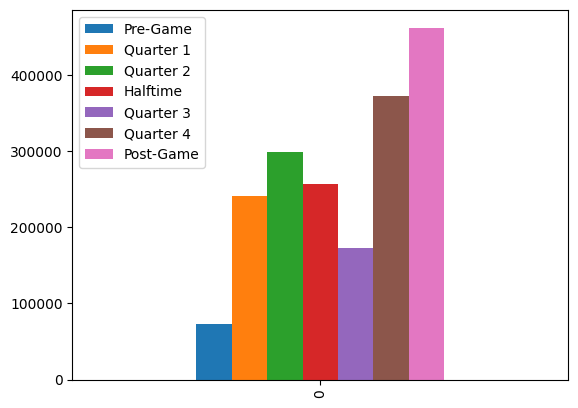

In [23]:
quarter_per_tweet.plot(kind='bar')

## Sentimental Analysis

In [24]:
sentiment_df = pd.read_csv('data\sentiment.csv')

In [25]:
sentiment_df.drop('target', axis=1, inplace=True)

In [26]:
sentiment_df.head()

,date,ids,text,user,Sentiment
0,2023-02-13T04:18:06.000Z,1.624986e+18,@DineshDSouza Reminds me of 7th grade 50years ...,HeyMon12924336,Positive
1,2023-02-13T04:17:58.000Z,1.624986e+18,2023 MAYFEST planning has begun! Apply now to ...,mayfest,Positive
2,2023-02-13T03:05:52.000Z,1.624968e+18,"RT @Tamil1947: Progressive, conscientious &amp...",sposhy0007,Positive
3,2023-02-13T03:05:11.000Z,1.624968e+18,@joaomcd_ @DelusionPosting God bless u Brasili...,subhuman356255,Negative
4,2023-02-13T03:01:05.000Z,1.624967e+18,"50 ವರ್ಷಗಳ ಹಿಂದೆ: ಮಂಗಳವಾರ, 13–2–1973 \n#50years...",prajavani,Negative


In [27]:
merged_sentiment = pd.merge(df, sentiment_df, left_on='id', right_on='ids')

In [28]:
merged_sentiment.head()

,time_period_of_the_game,brand_ad_name,keywords,created_at,possibly_sensitive,id,lang,text_x,entities.hashtags,entities.mentions,...,public_metrics.impression_count,entities.annotations,name,username,location,date,ids,text_y,user,Sentiment
0,Quarter 2,Bass Pro Shops,50years,2023-02-13T04:18:06.000Z,False,1.624986e+18,en,@DineshDSouza Reminds me of 7th grade 50years ...,NaN,"[{'start': 0, 'end': 13, 'username': 'DineshDS...",...,2.0,NaN,Hey Moon,HeyMon12924336,"Poteau, OK",2023-02-13T04:18:06.000Z,1.624986e+18,@DineshDSouza Reminds me of 7th grade 50years ...,HeyMon12924336,Positive
1,Quarter 2,Bass Pro Shops,50years,2023-02-13T04:17:58.000Z,False,1.624986e+18,en,2023 MAYFEST planning has begun! Apply now to ...,"[{'start': 187, 'end': 195, 'tag': 'Artists'},...","[{'start': 244, 'end': 251, 'username': 'utuls...",...,56.0,"[{'start': 5, 'end': 11, 'probability': 0.5639...",Tulsa Mayfest,mayfest,"Tulsa, Ok",2023-02-13T04:17:58.000Z,1.624986e+18,2023 MAYFEST planning has begun! Apply now to ...,mayfest,Positive
2,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:05:52.000Z,False,1.624968e+18,en,"RT @Tamil1947: Progressive, conscientious &amp...",NaN,"[{'start': 3, 'end': 13, 'username': 'Tamil194...",...,0.0,NaN,sposho,sposhy0007,NaN,2023-02-13T03:05:52.000Z,1.624968e+18,"RT @Tamil1947: Progressive, conscientious &amp...",sposhy0007,Positive
3,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:05:11.000Z,False,1.624968e+18,en,@joaomcd_ @DelusionPosting God bless u Brasili...,NaN,"[{'start': 0, 'end': 9, 'username': 'joaomcd_'...",...,7.0,"[{'start': 39, 'end': 47, 'probability': 0.497...",convicted sez offender,subhuman356255,FL,2023-02-13T03:05:11.000Z,1.624968e+18,@joaomcd_ @DelusionPosting God bless u Brasili...,subhuman356255,Negative
4,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:01:05.000Z,False,1.624967e+18,kn,"50 ವರ್ಷಗಳ ಹಿಂದೆ: ಮಂಗಳವಾರ, 13–2–1973 \n#50years...","[{'start': 37, 'end': 45, 'tag': '50years'}]",NaN,...,299.0,NaN,Prajavani,prajavani,Bengaluru,2023-02-13T03:01:05.000Z,1.624967e+18,"50 ವರ್ಷಗಳ ಹಿಂದೆ: ಮಂಗಳವಾರ, 13–2–1973 \n#50years...",prajavani,Negative


In [29]:
brand_vs_sentiment = merged_sentiment[['brand_ad_name', 'Sentiment']]

In [30]:
counts = brand_vs_sentiment.groupby(['brand_ad_name', 'Sentiment']).size().unstack(fill_value=0)

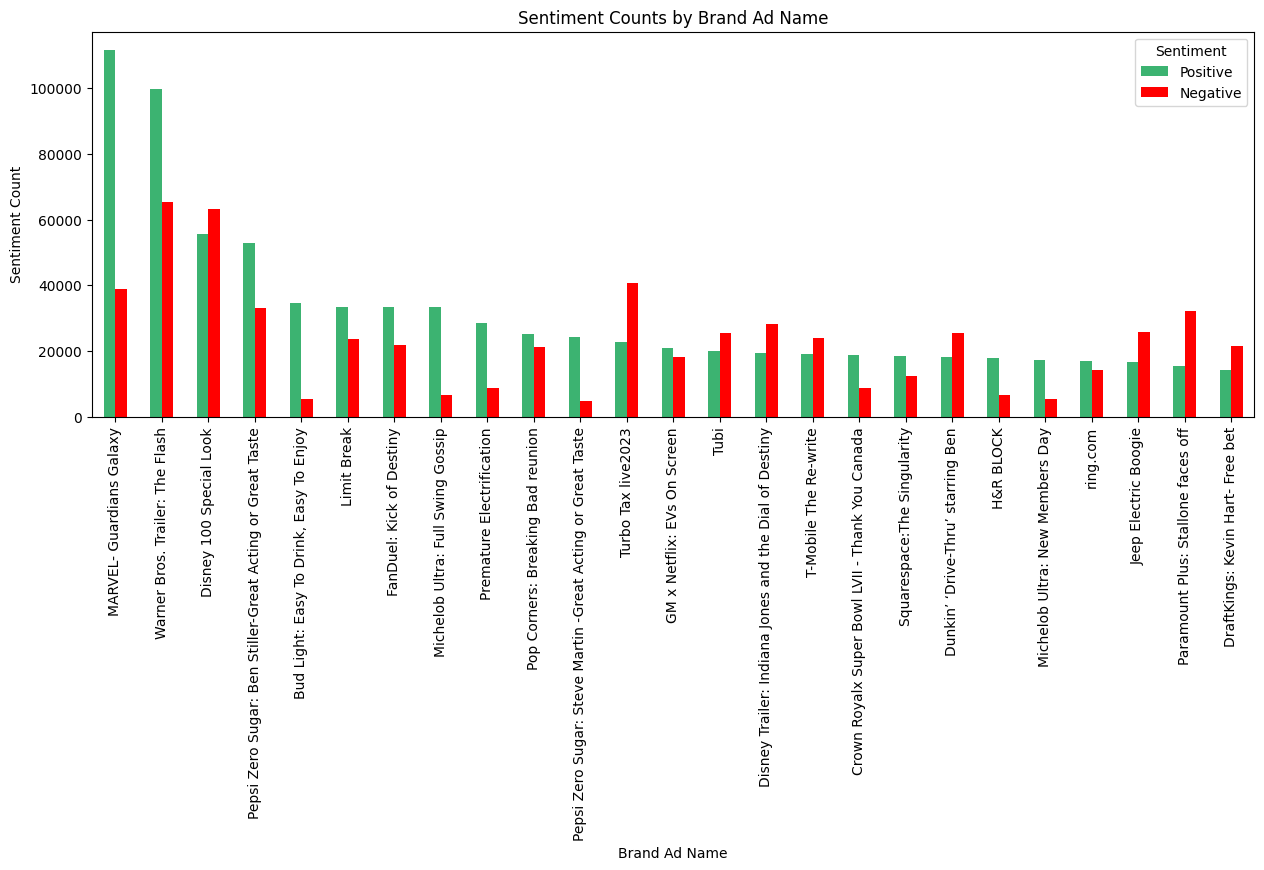

In [31]:
counts_sorted = counts.sort_values('Positive', ascending=False)
positive_plot = counts_sorted[:25].plot(kind='bar', y=['Positive', 'Negative'], figsize=(15, 5), color=['mediumseagreen', 'red'])

# Add x and y labels
positive_plot.set_xlabel('Brand Ad Name')
positive_plot.set_ylabel('Sentiment Count')

# Add a title
positive_plot.set_title('Sentiment Counts by Brand Ad Name')

counts_sorted['Difference'] = counts_sorted['Positive'] - counts_sorted['Negative']
counts_sorted.to_csv('export/gdac_sentiment_metrics.csv')

plt.show()

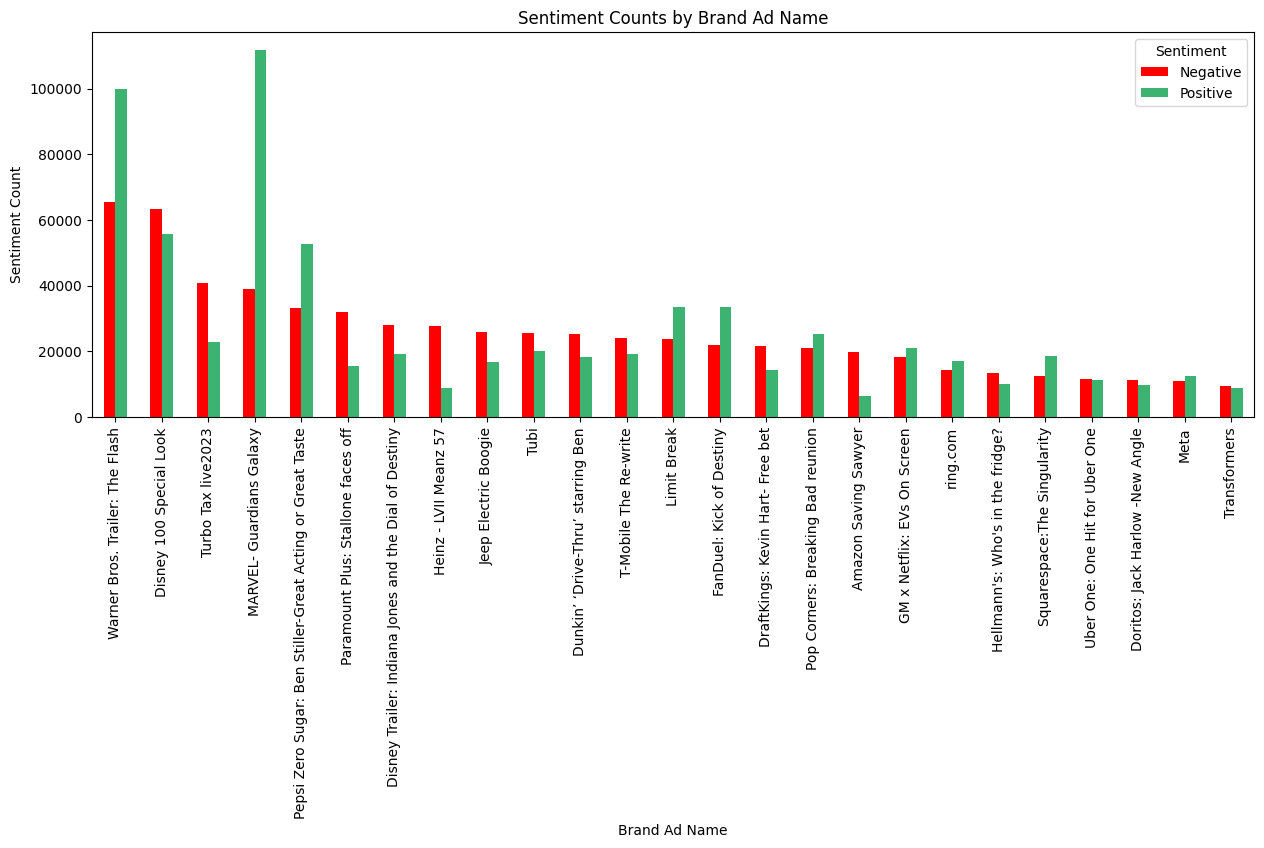

In [32]:
counts_sorted = counts.sort_values('Negative', ascending=False)
negative_plot = counts_sorted[:25].plot(kind='bar', y=['Negative', 'Positive'], figsize=(15, 5), color=['red', 'mediumseagreen'])

# Add x and y labels
negative_plot.set_xlabel('Brand Ad Name')
negative_plot.set_ylabel('Sentiment Count')

# Add a title
negative_plot.set_title('Sentiment Counts by Brand Ad Name')

plt.show()

## DigiDaigaku Investigation

In [33]:
digi_df = pd.merge(df, sentiment_df, left_on='id', right_on='ids')

In [34]:
digi_df.head()

,time_period_of_the_game,brand_ad_name,keywords,created_at,possibly_sensitive,id,lang,text_x,entities.hashtags,entities.mentions,...,public_metrics.impression_count,entities.annotations,name,username,location,date,ids,text_y,user,Sentiment
0,Quarter 2,Bass Pro Shops,50years,2023-02-13T04:18:06.000Z,False,1.624986e+18,en,@DineshDSouza Reminds me of 7th grade 50years ...,NaN,"[{'start': 0, 'end': 13, 'username': 'DineshDS...",...,2.0,NaN,Hey Moon,HeyMon12924336,"Poteau, OK",2023-02-13T04:18:06.000Z,1.624986e+18,@DineshDSouza Reminds me of 7th grade 50years ...,HeyMon12924336,Positive
1,Quarter 2,Bass Pro Shops,50years,2023-02-13T04:17:58.000Z,False,1.624986e+18,en,2023 MAYFEST planning has begun! Apply now to ...,"[{'start': 187, 'end': 195, 'tag': 'Artists'},...","[{'start': 244, 'end': 251, 'username': 'utuls...",...,56.0,"[{'start': 5, 'end': 11, 'probability': 0.5639...",Tulsa Mayfest,mayfest,"Tulsa, Ok",2023-02-13T04:17:58.000Z,1.624986e+18,2023 MAYFEST planning has begun! Apply now to ...,mayfest,Positive
2,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:05:52.000Z,False,1.624968e+18,en,"RT @Tamil1947: Progressive, conscientious &amp...",NaN,"[{'start': 3, 'end': 13, 'username': 'Tamil194...",...,0.0,NaN,sposho,sposhy0007,NaN,2023-02-13T03:05:52.000Z,1.624968e+18,"RT @Tamil1947: Progressive, conscientious &amp...",sposhy0007,Positive
3,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:05:11.000Z,False,1.624968e+18,en,@joaomcd_ @DelusionPosting God bless u Brasili...,NaN,"[{'start': 0, 'end': 9, 'username': 'joaomcd_'...",...,7.0,"[{'start': 39, 'end': 47, 'probability': 0.497...",convicted sez offender,subhuman356255,FL,2023-02-13T03:05:11.000Z,1.624968e+18,@joaomcd_ @DelusionPosting God bless u Brasili...,subhuman356255,Negative
4,Quarter 2,Bass Pro Shops,50years,2023-02-13T03:01:05.000Z,False,1.624967e+18,kn,"50 ವರ್ಷಗಳ ಹಿಂದೆ: ಮಂಗಳವಾರ, 13–2–1973 \n#50years...","[{'start': 37, 'end': 45, 'tag': '50years'}]",NaN,...,299.0,NaN,Prajavani,prajavani,Bengaluru,2023-02-13T03:01:05.000Z,1.624967e+18,"50 ವರ್ಷಗಳ ಹಿಂದೆ: ಮಂಗಳವಾರ, 13–2–1973 \n#50years...",prajavani,Negative


In [37]:
digi_df = digi_df[digi_df['brand_ad_name'] == "Limit Break"]

In [38]:
digi_df.head()

,time_period_of_the_game,brand_ad_name,keywords,created_at,possibly_sensitive,id,lang,text_x,entities.hashtags,entities.mentions,...,public_metrics.impression_count,entities.annotations,name,username,location,date,ids,text_y,user,Sentiment
8700,Quarter 1,Limit Break,digidaigaku,2023-02-13T03:29:38.000Z,False,1.624974e+18,en,Yo Whitelist now live! @MehdiBa86767245 @Loutr...,NaN,"[{'start': 23, 'end': 39, 'username': 'MehdiBa...",...,1.0,NaN,harry,harry_necza,NaN,2023-02-13T03:29:38.000Z,1.624974e+18,Yo Whitelist now live! @MehdiBa86767245 @Loutr...,harry_necza,Positive
8701,Quarter 1,Limit Break,digidaigaku,2023-02-13T03:29:38.000Z,False,1.624974e+18,en,Yo Whitelist now live! @MehdiBa86767245 @Loutr...,NaN,"[{'start': 23, 'end': 39, 'username': 'MehdiBa...",...,1.0,NaN,harry,harry_necza,NaN,2023-02-13T03:29:38.000Z,1.624974e+18,Yo Whitelist now live! @MehdiBa86767245 @Loutr...,harry_necza,Positive
12875,Quarter 1,Limit Break,digidaigaku,2023-02-13T03:33:40.000Z,False,1.624975e+18,en,@DigiDaigaku great,NaN,"[{'start': 0, 'end': 12, 'username': 'DigiDaig...",...,4.0,NaN,Liem Mars capital,nhan29271879,NaN,2023-02-13T03:33:40.000Z,1.624975e+18,This is how problems should be solved. \n\nPle...,haw_beniaz,Positive
12876,Quarter 1,Limit Break,digidaigaku,2023-02-13T03:33:40.000Z,False,1.624975e+18,en,@DigiDaigaku great,NaN,"[{'start': 0, 'end': 12, 'username': 'DigiDaig...",...,4.0,NaN,Liem Mars capital,nhan29271879,NaN,2023-02-13T03:33:40.000Z,1.624975e+18,@DigiDaigaku great,nhan29271879,Positive
17034,Quarter 1,Limit Break,limitbreak,2023-02-12T23:56:31.000Z,False,1.624920e+18,en,limitbreak seems like a shitty iphone game but...,NaN,NaN,...,190.0,"[{'start': 0, 'end': 9, 'probability': 0.6656,...",nancy,internet__diary,buffalo-philadelphia,2023-02-12T23:56:31.000Z,1.624920e+18,limitbreak seems like a shitty iphone game but...,internet__diary,Negative


In [39]:
digi_df_freq = digi_df.groupby('keywords').size().reset_index(name='keyword_freq')

In [40]:
digi_df_freq.head()

,keywords,keyword_freq
0,digidaigaku,40326
1,limitbreak,12081
